# Assignment 1 

I think I really understood how to intuit about the positional encodings for the first time

In [2]:
import numpy as np

In [8]:
def get_angles(pos, k, d):
    """
    Get the angles for the positional encoding
    
    Arguments:
        pos -- Column vector containing the positions [[0], [1], ...,[N-1]]
        k --   Row vector containing the dimension span [[0, 1, 2, ..., d-1]]
        d(integer) -- Encoding size
    
    Returns:
        angles -- (pos, d) numpy array 
    """
    
    # START CODE HERE
    # Get i from dimension span k
    i = k//2
    # Calculate the angles using pos, i and d
    angles = pos / 10000 ** (2*i/d)
    # END CODE HERE
    
    return angles


def positional_encoding(positions, d):
    """
    Precomputes a matrix with all the positional encodings 
    
    Arguments:
        positions (int) -- Maximum number of positions to be encoded 
        d (int) -- Encoding size 
    
    Returns:
        pos_encoding -- (1, position, d_model) A matrix with the positional encodings
    """
    # START CODE HERE
    # initialize a matrix angle_rads of all the angles 
    angle_rads = get_angles(np.arange(positions).reshape(positions,1),
                            np.arange(d).reshape(1,d),
                            d)
  
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    # END CODE HERE
    
    pos_encoding = angle_rads[np.newaxis, ...]
    return pos_encoding

### Look at this beauty below

(1, 50, 200)


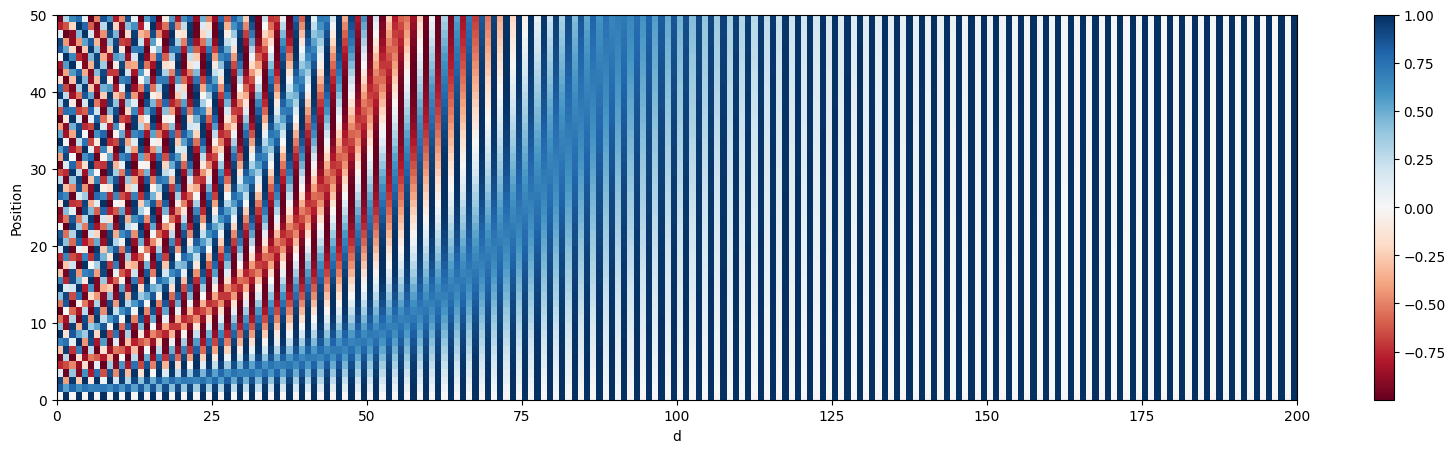

In [11]:

import matplotlib.pyplot as plt

d = 200
p = 50
pos_encoding = positional_encoding(p,d)

print (pos_encoding.shape)
plt.figure(figsize=(20,5))
plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('d')
plt.xlim((0, d))
plt.ylabel('Position')
plt.colorbar()
plt.show()

<font color='blue'>
    <b>What you should remember</b>:

- The combination of self-attention and convolutional network layers allows of parallelization of training and *faster training*.
- Self-attention is calculated using the generated query Q, key K, and value V matrices.
- Adding positional encoding to word embeddings is an effective way to include sequence information in self-attention calculations. 
- Multi-head attention can help detect multiple features in your sentence.
- Masking stops the model from 'looking ahead' during training, or weighting zeroes too much when processing cropped sentences. 